<a href="https://colab.research.google.com/github/shreya0202/Vanets_Intrusion_Detection_System/blob/main/Vanet_Intrusion_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00415/VANET%20dataset.zip

--2021-03-21 06:21:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/00415/VANET%20dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34415050 (33M) [application/x-httpd-php]
Saving to: ‘VANET dataset.zip’

VANET dataset.zip   100%[===================>]  32.82M  28.1MB/s    in 1.2s    

2021-03-21 06:21:27 (28.1 MB/s) - ‘VANET dataset.zip’ saved [34415050/34415050]



In [ ]:
import shutil
shutil.unpack_archive('/content/VANET dataset.zip')

# Importing Required libraries for Modelling & Loading The data:

In [ ]:
#importing pandas and numpy
import pandas as pd
import numpy as np

# visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

# Train Test Split
from sklearn.model_selection import train_test_split
 
# ML classifier Models
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

#class imbalance Undersampling
from imblearn.under_sampling import RandomUnderSampler


# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Reading And Understanding Data:

In [ ]:
# Reading Benign Data
one_obu_normal = pd.read_excel('/content/VANET dataset/Normal/Normal.xlsx',sheet_name='1OBU')
one_obu_normal = one_obu_normal.iloc[:31,:18]
one_obu_normal.columns = one_obu_normal.iloc[0,:]
one_obu_normal = one_obu_normal.iloc[1:,:]
one_obu_normal['OBU']=1
one_obu_normal['Target']='Benign'


ten_obu_normal = pd.read_excel('/content/VANET dataset/Normal/Normal.xlsx',sheet_name='10OBU')
ten_obu_normal = ten_obu_normal.iloc[:31,:18]
ten_obu_normal.columns = ten_obu_normal.iloc[0,:]
ten_obu_normal = ten_obu_normal.iloc[1:,:]
ten_obu_normal['OBU']=10
ten_obu_normal['Target']='Benign'


twenty_obu_normal = pd.read_excel('/content/VANET dataset/Normal/Normal.xlsx',sheet_name='20OBU')
twenty_obu_normal = twenty_obu_normal.iloc[:31,:18]
twenty_obu_normal.columns = twenty_obu_normal.iloc[0,:]
twenty_obu_normal = twenty_obu_normal.iloc[1:,:]
twenty_obu_normal['OBU']=20
twenty_obu_normal['Target']='Benign'


fourty_obu_normal = pd.read_excel('/content/VANET dataset/Normal/Normal.xlsx',sheet_name='40OBU')
fourty_obu_normal = fourty_obu_normal.iloc[:31,:18]
fourty_obu_normal.columns = fourty_obu_normal.iloc[0,:]
fourty_obu_normal = fourty_obu_normal.iloc[1:,:]
fourty_obu_normal['OBU']=40
fourty_obu_normal['Target']='Benign'


sixty_obu_normal = pd.read_excel('/content/VANET dataset/Normal/Normal.xlsx',sheet_name='60OBU')
sixty_obu_normal = sixty_obu_normal.iloc[:31,:18]
sixty_obu_normal.columns = sixty_obu_normal.iloc[0,:]
sixty_obu_normal = sixty_obu_normal.iloc[1:,:]
sixty_obu_normal['OBU']=60
sixty_obu_normal['Target']='Benign'


eighty_obu_normal = pd.read_excel('/content/VANET dataset/Normal/Normal.xlsx',sheet_name='80OBU')
eighty_obu_normal = eighty_obu_normal.iloc[:31,:18]
eighty_obu_normal.columns = eighty_obu_normal.iloc[0,:]
eighty_obu_normal = eighty_obu_normal.iloc[1:,:]
eighty_obu_normal['OBU']=80
eighty_obu_normal['Target']='Benign'


hundred_obu_normal = pd.read_excel('/content/VANET dataset/Normal/Normal.xlsx',sheet_name='100OBU')
hundred_obu_normal = hundred_obu_normal.iloc[:31,:18]
hundred_obu_normal.columns = hundred_obu_normal.iloc[0,:]
hundred_obu_normal = hundred_obu_normal.iloc[1:,:]
hundred_obu_normal['OBU']=100
hundred_obu_normal['Target']='Benign'


normal_data = pd.concat([one_obu_normal, ten_obu_normal, twenty_obu_normal, fourty_obu_normal, sixty_obu_normal, eighty_obu_normal, hundred_obu_normal], axis=0)
normal_data = normal_data.rename(columns={'RSU-PDSR (%)':'RSU PDSR (%)'})
print(normal_data.shape)
normal_data.head()

(210, 21)


,T (s),RSU Intended-Tx,RSU-BTx-Car,RSU-PSR (%),Car P-Received,Car-PDR (%),RSU PDSR (%),CAR Intended-Tx,Car-Btx-RSU,Car-PSR (%),RSU P-Received,RSU-PDR (%),Car-PDSR (%),Aggregated Thput (Kbps),Car Received power (dBm),Car Received SNR (dBm),RSU Received power (dBm),RSU Received SNR (dBm),OBU,Target,Aggregated Thput (Kbps/s)
1,1,10,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,1,Benign,NaN
2,2,10,10,100,10,100,100,10,9,90,9,100,95,24.78,-69.8945,34.1055,-70.6981,33.3019,1,Benign,NaN
3,3,10,10,100,10,100,100,10,9,90,7,77.7778,83.8889,25.92,-65.8985,38.1015,-66.3227,37.6773,1,Benign,NaN
4,4,10,10,100,10,100,100,10,10,100,10,100,100,25.92,-67.2749,36.7251,-67.584,36.416,1,Benign,NaN
5,5,10,10,100,10,100,100,10,10,100,9,90,95,25.92,-66.3813,37.6187,-68.9482,35.0518,1,Benign,NaN


In [ ]:
# Reading Malignant Data
one_obu_attack = pd.read_excel('/content/VANET dataset/Jammer/Attacker.xlsx',sheet_name='1OBU')
one_obu_attack = one_obu_attack.iloc[:31,:13]
one_obu_attack.columns = one_obu_attack.iloc[0,:]
one_obu_attack = one_obu_attack.iloc[1:,:]
one_obu_attack['OBU']=1
one_obu_attack['Target']='Malignant'
columns_list = one_obu_attack.columns

ten_obu_attack = pd.read_excel('/content/VANET dataset/Jammer/Attacker.xlsx',sheet_name='10OBU')
ten_obu_attack = ten_obu_attack.iloc[:31,:13]
ten_obu_attack.columns = ten_obu_attack.iloc[0,:]
ten_obu_attack = ten_obu_attack.iloc[1:,:]
ten_obu_attack['OBU']=10
ten_obu_attack['Target']='Malignant'


twenty_obu_attack = pd.read_excel('/content/VANET dataset/Jammer/Attacker.xlsx',sheet_name='20OBU')
twenty_obu_attack = twenty_obu_attack.iloc[:31,:13]
twenty_obu_attack.columns = twenty_obu_attack.iloc[0,:]
twenty_obu_attack = twenty_obu_attack.iloc[1:,:]
twenty_obu_attack['OBU']=20
twenty_obu_attack['Target']='Malignant'


fourty_obu_attack = pd.read_excel('/content/VANET dataset/Jammer/Attacker.xlsx',sheet_name='40OBU')
fourty_obu_attack = fourty_obu_attack.iloc[:31,:13]
fourty_obu_attack.columns = fourty_obu_attack.iloc[0,:]
fourty_obu_attack = fourty_obu_attack.iloc[1:,:]
fourty_obu_attack['OBU']=40
fourty_obu_attack['Target']='Malignant'


sixty_obu_attack = pd.read_excel('/content/VANET dataset/Jammer/Attacker.xlsx',sheet_name='60OBU')
sixty_obu_attack = sixty_obu_attack.iloc[:31,:13]
sixty_obu_attack.columns = sixty_obu_attack.iloc[0,:]
sixty_obu_attack = sixty_obu_attack.iloc[1:,:]
sixty_obu_attack['OBU']=60
sixty_obu_attack['Target']='Malignant'


eighty_obu_attack = pd.read_excel('/content/VANET dataset/Jammer/Attacker.xlsx',sheet_name='80OBU')
eighty_obu_attack = eighty_obu_attack.iloc[:31,:13]
eighty_obu_attack.columns = eighty_obu_attack.iloc[0,:]
eighty_obu_attack = eighty_obu_attack.iloc[1:,:]
eighty_obu_attack['OBU']=80
eighty_obu_attack['Target']='Malignant'



attack_data = pd.concat([one_obu_attack, ten_obu_attack, twenty_obu_attack, fourty_obu_attack, sixty_obu_attack, eighty_obu_attack], axis=0)
columns = attack_data.columns
print(attack_data.shape)
attack_data.head()

(180, 15)


,T (s),RSU Intended-Tx,RSU-BTx-Car,RSU-PSR (%),Car P-Received,Car-PDR (%),RSU PDSR (%),Car Received power (dBm),CAR Intended-Tx,Car-Btx-RSU,RSU P-Received,RSU-PDR (%),RSU Received power (dBm),OBU,Target
1,1,10,10,100,1,10,55,-48.6723,10,10,1,10,-48.3232,1,Malignant
2,2,10,10,100,0,0,50,-44.6763,10,10,1,10,-49.4759,1,Malignant
3,3,10,8,80,1,12.5,46.25,-46.0527,10,10,0,0,-45.1005,1,Malignant
4,4,10,10,100,0,0,50,-45.1591,10,10,1,10,-46.3618,1,Malignant
5,5,10,10,100,1,10,55,-46.3192,10,10,1,10,-47.726,1,Malignant


In [ ]:
# shape, head of concatenated data.
data = pd.concat([attack_data, normal_data[columns],], join='inner')
print(data.shape)
data.head()

(390, 15)


,T (s),RSU Intended-Tx,RSU-BTx-Car,RSU-PSR (%),Car P-Received,Car-PDR (%),RSU PDSR (%),Car Received power (dBm),CAR Intended-Tx,Car-Btx-RSU,RSU P-Received,RSU-PDR (%),RSU Received power (dBm),OBU,Target
1,1,10,10,100,1,10,55,-48.6723,10,10,1,10,-48.3232,1,Malignant
2,2,10,10,100,0,0,50,-44.6763,10,10,1,10,-49.4759,1,Malignant
3,3,10,8,80,1,12.5,46.25,-46.0527,10,10,0,0,-45.1005,1,Malignant
4,4,10,10,100,0,0,50,-45.1591,10,10,1,10,-46.3618,1,Malignant
5,5,10,10,100,1,10,55,-46.3192,10,10,1,10,-47.726,1,Malignant


In [ ]:
# shape, head of concatenated data.
print(data.shape)
data.head()

(390, 15)


,T (s),RSU Intended-Tx,RSU-BTx-Car,RSU-PSR (%),Car P-Received,Car-PDR (%),RSU PDSR (%),Car Received power (dBm),CAR Intended-Tx,Car-Btx-RSU,RSU P-Received,RSU-PDR (%),RSU Received power (dBm),OBU,Target
1,1,10,10,100,1,10,55,-48.6723,10,10,1,10,-48.3232,1,Malignant
2,2,10,10,100,0,0,50,-44.6763,10,10,1,10,-49.4759,1,Malignant
3,3,10,8,80,1,12.5,46.25,-46.0527,10,10,0,0,-45.1005,1,Malignant
4,4,10,10,100,0,0,50,-45.1591,10,10,1,10,-46.3618,1,Malignant
5,5,10,10,100,1,10,55,-46.3192,10,10,1,10,-47.726,1,Malignant


# Inspecting The data:


In [ ]:
# Checking complete information of data like memory, rows, columns, datatypes, nulls.
X = data.iloc[:,:-1].astype(float)
y = data.iloc[:,-1]
data = pd.concat([X,y], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 1 to 30
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   T (s)                     390 non-null    float64
 1   RSU Intended-Tx           390 non-null    float64
 2   RSU-BTx-Car               390 non-null    float64
 3   RSU-PSR (%)               390 non-null    float64
 4   Car P-Received            390 non-null    float64
 5   Car-PDR (%)               390 non-null    float64
 6   RSU PDSR (%)              390 non-null    float64
 7   Car Received power (dBm)  390 non-null    float64
 8   CAR Intended-Tx           390 non-null    float64
 9   Car-Btx-RSU               390 non-null    float64
 10  RSU P-Received            390 non-null    float64
 11  RSU-PDR (%)               390 non-null    float64
 12  RSU Received power (dBm)  390 non-null    float64
 13  OBU                       390 non-null    float64
 14  Target     

In [ ]:
# Checking the different percentage of quantiles in the data & count of rows, mean, standard deviation, minimum value in column, maximum value in column.
data.describe(percentiles = [0,0.2,0.4,0.5,0.7,0.8,1])

,T (s),RSU Intended-Tx,RSU-BTx-Car,RSU-PSR (%),Car P-Received,Car-PDR (%),RSU PDSR (%),Car Received power (dBm),CAR Intended-Tx,Car-Btx-RSU,RSU P-Received,RSU-PDR (%),RSU Received power (dBm),OBU
count,390.00000,390.0,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.0,390.000000,390.000000,390.000000,390.000000,390.000000
mean,15.50000,10.0,8.587179,85.871795,3.635897,40.510379,63.319292,-58.082995,10.0,9.374359,3.272323,33.632506,-56.803802,40.153846
std,8.66656,0.0,2.095739,20.957393,2.724872,28.314514,19.601299,13.526229,0.0,1.661095,2.661003,26.864473,14.478617,31.956380
min,1.00000,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,-81.356550,10.0,0.000000,0.000000,0.000000,-76.446226,1.000000
0%,1.00000,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,-81.356550,10.0,0.000000,0.000000,0.000000,-76.446226,1.000000
20%,6.80000,10.0,7.000000,70.000000,1.000000,11.111111,49.095238,-67.169431,10.0,9.000000,0.938000,10.000000,-66.496857,10.000000
40%,12.60000,10.0,9.000000,90.000000,3.000000,30.000000,60.000000,-63.356825,10.0,10.000000,2.000000,20.000000,-63.086055,20.000000
50%,15.50000,10.0,10.000000,100.000000,3.000000,40.000000,65.000000,-61.500635,10.0,10.000000,2.733333,29.054131,-60.970979,40.000000
70%,21.30000,10.0,10.000000,100.000000,5.000000,55.555556,71.666667,-57.908863,10.0,10.000000,5.000000,50.000000,-56.702097,60.000000
80%,24.20000,10.0,10.000000,100.000000,6.000000,66.666667,80.000000,-49.587829,10.0,10.000000,5.600000,57.822222,-48.214172,80.000000


# Dropping Unnecessary Columns With Zero Standard Deviation, Index columns

In [ ]:
# dropping index type columns and zero standard deviation columns which do not have any predictive capability.
data.drop(['T (s)', 'RSU Intended-Tx', 'CAR Intended-Tx'], inplace =True ,axis =1)

# Encoding the data:

In [ ]:
# Mapping 'Malign' as 1, 'Benign' as 0. So, 1 indicates Malign and 0 indicates Benign.
data['Target'] = data['Target'].apply(lambda x:1 if ('Malignant' in x) else 0)

In [ ]:
# Final head view of data
data.head()

,RSU-BTx-Car,RSU-PSR (%),Car P-Received,Car-PDR (%),RSU PDSR (%),Car Received power (dBm),Car-Btx-RSU,RSU P-Received,RSU-PDR (%),RSU Received power (dBm),OBU,Target
1,10.0,100.0,1.0,10.0,55.00,-48.672344,10.0,1.0,10.0,-48.323210,1.0,1
2,10.0,100.0,0.0,0.0,50.00,-44.676311,10.0,1.0,10.0,-49.475945,1.0,1
3,8.0,80.0,1.0,12.5,46.25,-46.052743,10.0,0.0,0.0,-45.100457,1.0,1
4,10.0,100.0,0.0,0.0,50.00,-45.159092,10.0,1.0,10.0,-46.361828,1.0,1
5,10.0,100.0,1.0,10.0,55.00,-46.319235,10.0,1.0,10.0,-47.726015,1.0,1


In [ ]:
data['Target'].value_counts()

0    210
1    180
Name: Target, dtype: int64

# Exploratory Data Analysis:


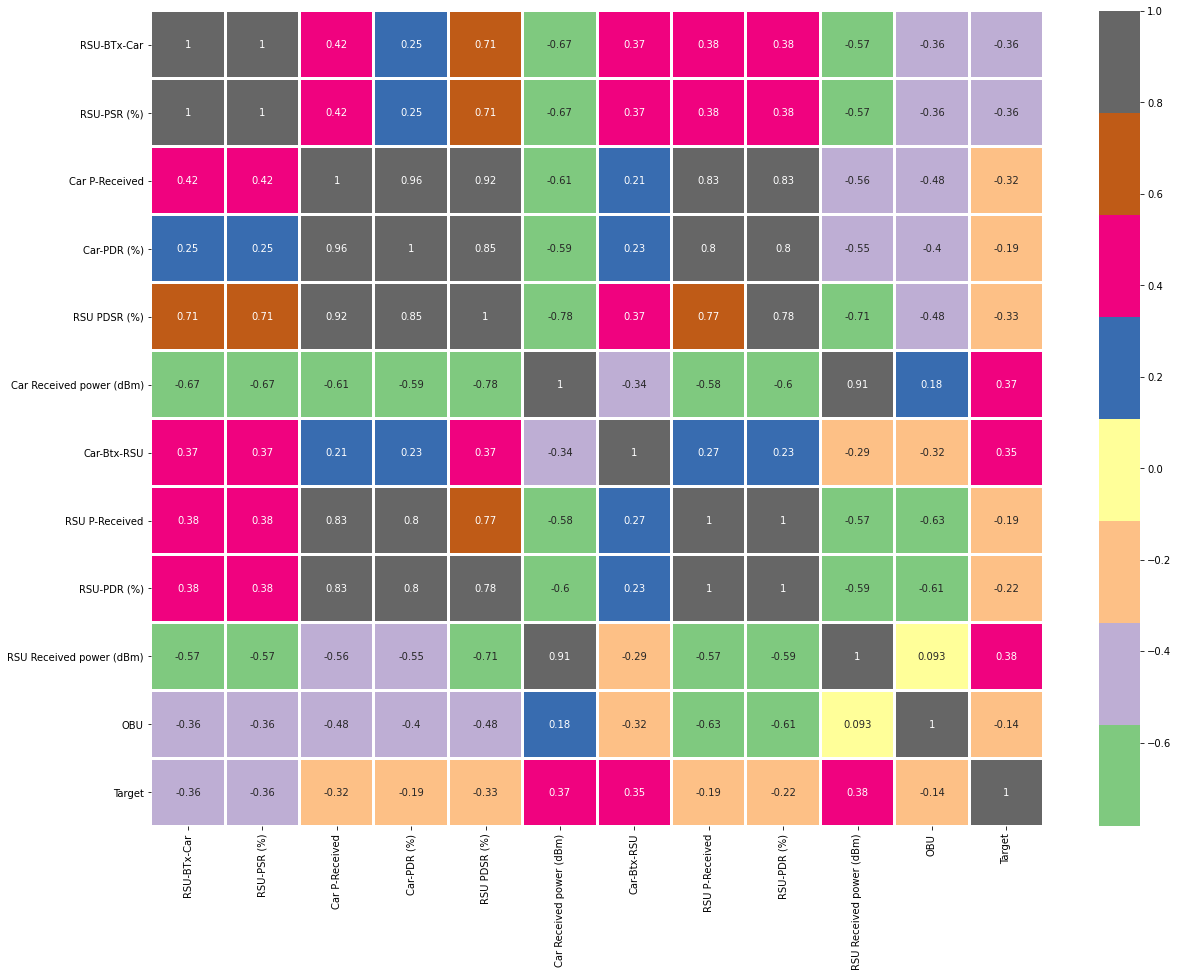

In [ ]:
# Calculating pearson correlation coefficient
corr_data = data.corr()

# Creating a figure with width 20, height 15 & plotting heatmap with correlation data using seaborn
plt.figure(figsize=(20,15))
sns.heatmap(corr_data, cmap='Accent', linewidths=2, annot=True)
plt.show()

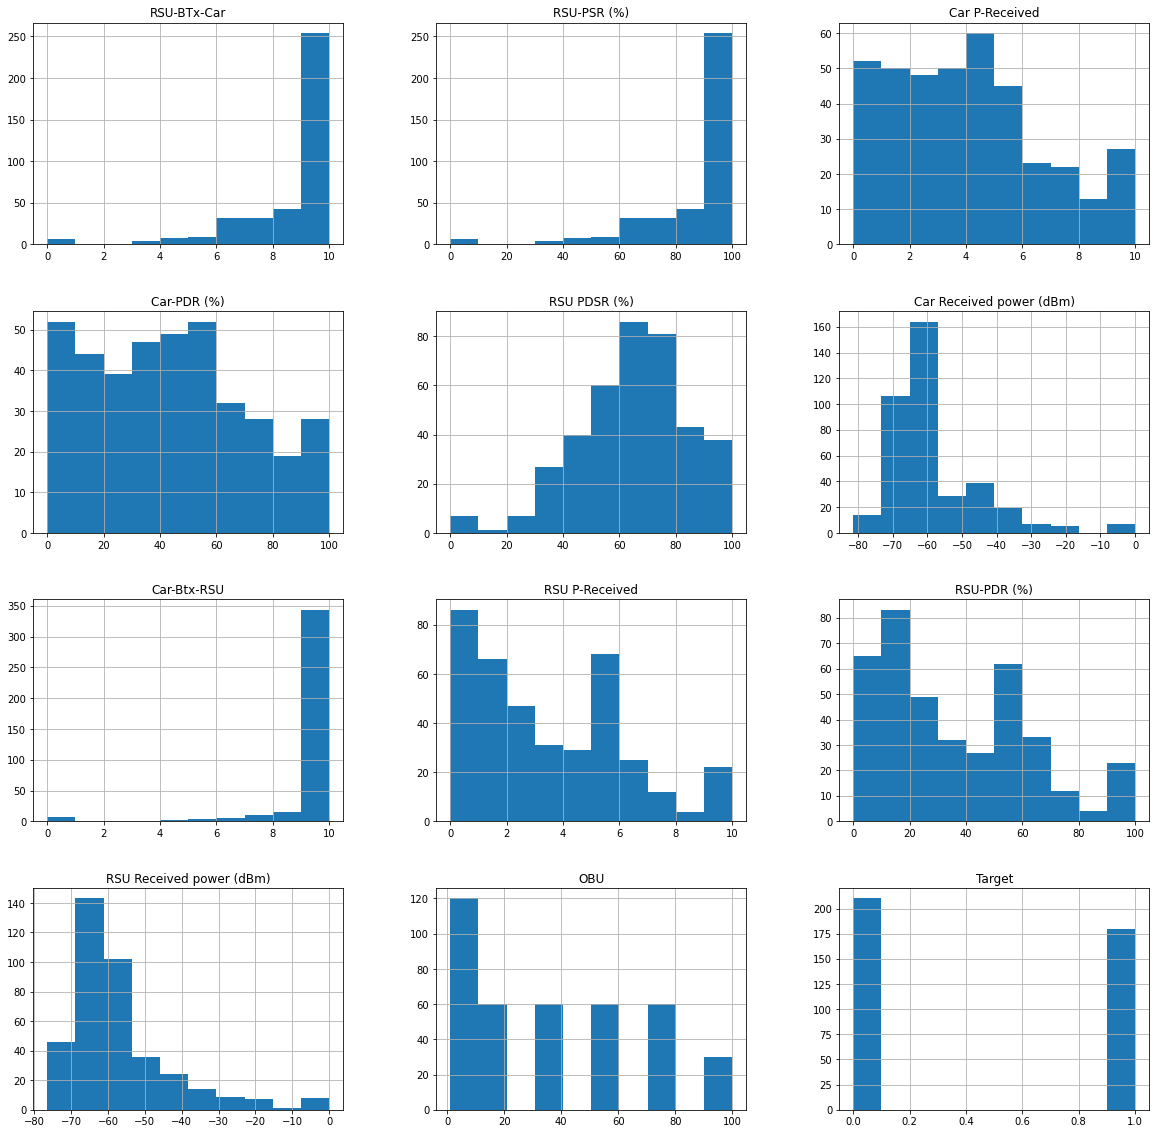

In [ ]:
# Histogram bins distribution plot of the data using hist attribute for pandas dataframe.
data.hist(figsize=(20,20))
plt.show()

# Splitting the data into Train, Test datasets:

In [ ]:
# Creating X dataframe by dropping Target column.
X = data.drop(['Target'], axis=1)

# Creating y dataframe which is target.
y = data['Target']

In [ ]:
# Train-Test-split in the ratio of Train:80% and Test:20% 
# Best Random States are 159,263, 268, 373
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,test_size=0.20,random_state=263)

# Undersampling the class indicated by 0 (other than malign)
under = RandomUnderSampler(sampling_strategy = 1, random_state = 263)

# Resampling the data with under sampler
X_train, y_train = under.fit_resample(X_train.astype(float), y_train.astype(int))
X_test, y_test = under.fit_resample(X_test.astype(float), y_test.astype(int))

In [ ]:
# Converting X_train, X_test, y_train, y_test back to dataframes from array type.
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
X_train.columns = X.columns
X_test.columns = X.columns

# Assign back name of Target column
y_train.columns =['Target']
y_test.columns = ['Target']

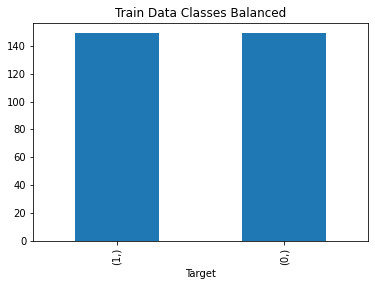

In [ ]:
# Checking Class imbalance after Undersampling:

# Balanced classes in y_train
plt.title('Train Data Classes Balanced')
y_train.value_counts().plot.bar()
plt.show()

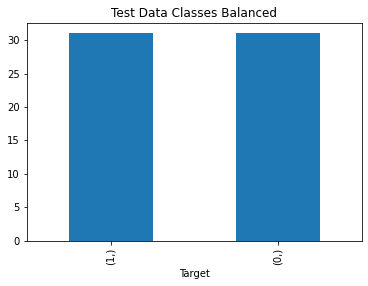

In [ ]:
# Checking Class imbalance:

# Balanced classes in y_test
plt.title('Test Data Classes Balanced')
y_test.value_counts().plot.bar()
plt.show()

# Tuning of Decision Tree Classifier:

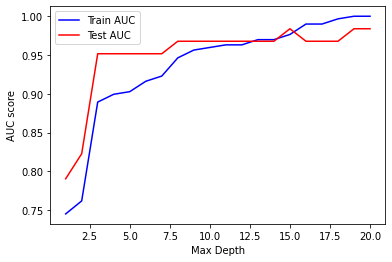

In [ ]:
# InDepth Tuning Maximum Depth parameter.

# Assigning range of parameter of max_depth
max_depths = np.linspace(1,20,num=20,endpoint=True).astype(int)

# Two lists for string training & testing results.
train_results = []
test_results = []

# Iterating over the range of parameters of max_depth
for max_depth in max_depths:
      
      # Creating & Fitting DT classifier for a max_depth parameter each time in the loop with entropy as impurity criterion.
      DT_model = DecisionTreeClassifier(criterion= 'entropy', max_depth = max_depth, random_state=9)
      DT_model.fit(X_train, y_train)

      # Prediction on the X_train data, Roc CURVE on the train data, Area under curve metric calculation and at last appending the train auc results.
      train_pred = DT_model.predict(X_train)
      false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
      roc_auc = auc(false_positive_rate, true_positive_rate)
      train_results.append(roc_auc)

      # Prediction on the X_test data, ROC CURVE on the test data, Area under curve metric calculation and at last appending the test auc results.
      y_pred = DT_model.predict(X_test)
      false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
      roc_auc = auc(false_positive_rate, true_positive_rate)
      test_results.append(roc_auc)

# Plotting the train results, test auc results
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2 = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(loc='best')
plt.ylabel('AUC score')
plt.xlabel('Max Depth')
plt.show()

# Creating dataframe with train and test auc results
max_depth_df = pd.DataFrame({'max_depths':max_depths,'test_results':test_results, 'train_results':train_results}).sort_values(by='test_results')



In [ ]:
max_depth_df

,max_depths,test_results,train_results
0,1,0.790323,0.744966
1,2,0.822581,0.761745
2,3,0.951613,0.889262
3,4,0.951613,0.899329
4,5,0.951613,0.902685
5,6,0.951613,0.916107
6,7,0.951613,0.922819
17,18,0.967742,0.996644
16,17,0.967742,0.989933
15,16,0.967742,0.989933


# Tuned Decision Tree Classifier:
#### Checking the metrics of 
- Confusion Matrix
- Repeated Cross Validation score
- Precision
- recall
- f1_score
- Area under curve 

In [ ]:
# Tuned Decision Tree Model max Depth as 8 with entropy as impurity criterion.
DT_model = DecisionTreeClassifier(criterion= 'entropy', max_depth = 8, random_state=9)
DT_model.fit(X_train, y_train)

# Repeated stratified Cross validation with 10 folds, CV scores with 10 repeats & Calculating mean of 10 CV scores.
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)
n_scores = cross_val_score(DT_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
mean_cv = (100*np.mean(n_scores).round(2))

# Cross validation Score & its standard deviation.
print('Cross Validation Accuracy: {0}%  Standard Deviation: {1}' .format(mean_cv, np.std(n_scores).round(2)))
print(' ')

# Prediction on Train and Test datasets, Accuracy scores for train and test rounded to 2 decimals.
train_pred = DT_model.predict(X_train)
y_pred=DT_model.predict(X_test)
accuracy = DT_model.score(X_train,y_train)
test_accuracy = 100*(metrics.accuracy_score(y_test, y_pred).round(2))
print('Classifier Training accuracy score:',100*accuracy.round(2),'%')
print('Classifier Test Accuracy Score:',test_accuracy,'%')
print(' ')

# Model Classification report & Confusion Matrix
print(metrics.classification_report(y_test,y_pred))
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)

# ROC & Area Under the curve for train dataset. 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
train_roc_auc = auc(false_positive_rate, true_positive_rate)

# Creating True positive, True Negative, False Positive, False Negative.
TP = cm[0][0]
TN = cm[1][1]
FP = cm[1][0]
FN = cm[0][1]

# Test data metrics calculation like precision, recall, f1_score, roc curve, Area under curve.
test_precision = metrics.precision_score(y_test, y_pred)
test_recall = metrics.recall_score(y_test, y_pred)
test_f1_score = metrics.f1_score(y_test, y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
test_roc_auc = auc(false_positive_rate, true_positive_rate)


# Creating DataFrame for all the metrics.
DT_results = pd.DataFrame({'Test Accuracy (%)': test_accuracy, 'Train Accuracy (%)':100*accuracy.round(2),'10 Fold Cross Validation Accuracy (%)': mean_cv, 'Test Area Under Curve':test_roc_auc, 'Train Area Under Curve':train_roc_auc,'Test Precision': test_precision,
              'Test Recall': test_recall, 'Test F1 Score': test_f1_score, 'TP':TP, 'TN':TN, 'FP':FP, 'FN':FN},index=[0])

# View the metrics in dataframe
DT_results

Cross Validation Accuracy: 87.0%  Standard Deviation: 0.06
 
Classifier Training accuracy score: 95.0 %
Classifier Test Accuracy Score: 97.0 %
 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       1.00      0.94      0.97        31

    accuracy                           0.97        62
   macro avg       0.97      0.97      0.97        62
weighted avg       0.97      0.97      0.97        62

[[31  0]
 [ 2 29]]


,Test Accuracy (%),Train Accuracy (%),10 Fold Cross Validation Accuracy (%),Test Area Under Curve,Train Area Under Curve,Test Precision,Test Recall,Test F1 Score,TP,TN,FP,FN
0,97.0,95.0,87.0,0.967742,0.946309,1.0,0.935484,0.966667,31,29,2,0


# Receiver Operating Charateristics

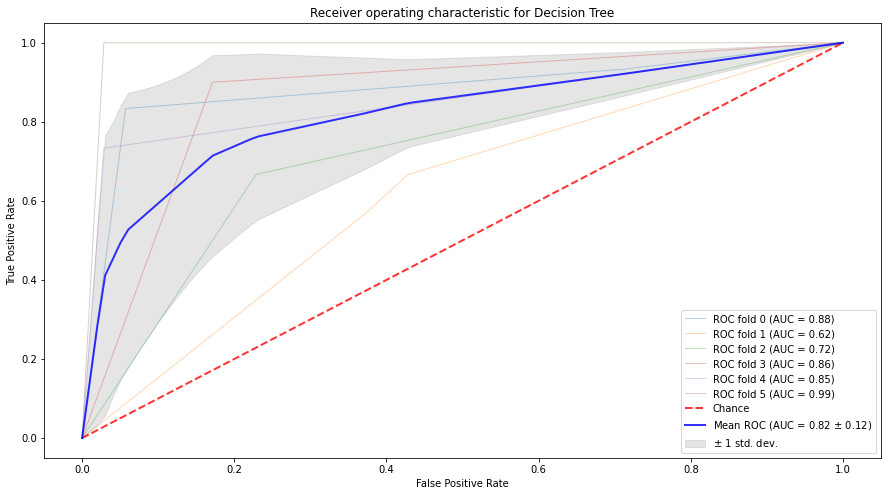

In [ ]:
# Receiver Operating Charateristics Plot

# Creating numpy array from X and y datasets
np_X = np.array(X)
np_y = np.array(y)

# Storing shape of array into n_samples, n_features
n_samples, n_features = np_X.shape

# Create an array for storing true positive rates and area under curve.
tprs = []
aucs = []

# create a mean false positive rate range in between 0 to 1.
mean_fpr = np.linspace(0, 1, 100)

# Create a figure with axis and subplots support.
fig, ax = plt.subplots()

# Run stratified cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)

# Loop Over the Splits of data for cross validation of 6 splits
for i, (train, test) in enumerate(cv.split(np_X, np_y) ):
    
    DT_model.fit(np_X[train], np_y[train])                                      # Fit the model on the train data leaving validation data in each split.
    viz = metrics.plot_roc_curve(DT_model, np_X[test] ,np_y[test] ,
                         name='ROC fold {}'.format(i),                          # plot the ROC curve for each split on the data.
                         alpha=0.3, lw=1, ax=ax)
    
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)                          # Interpolating Actual false positive rate and true positive rate at each point of assumed mean_fpr.
    interp_tpr[0] = 0.0                                                         # numpy.interp(x, xp, fp) function returns the one-dimensional
                                                                                # piecewise linear interpolant to a function with 
                                                                                # given discrete data points (xp, fp), evaluated at x.

    tprs.append(interp_tpr)                                                     # Append the true positive rates values to tprs array.
    aucs.append(viz.roc_auc)                                                    # Append the area under curve values to aucs array. 


# plotting Chance line which shows the diagnol line with area under curve required.
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

# finding the mean value of true positive rate corresponting to mean_fpr instances.
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0

# Calculating mean area under curve & standard deviations
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Finally plotting Mean ROC line into the figure.
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

# Calculating Standard deviation between lower and upper true positive rates to fill in between
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

# Set the title of plot, Best Legend Location, Figure size in inches.
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic for Decision Tree")
ax.legend(loc="lower right")
fig.set_size_inches(15,8)
plt.show()

# Plotting Decision Tree:

In [ ]:
# importing pydotplus for creating the Decision Tree & export_graphviz for exporting tree to an image format.
import pydotplus
from sklearn.tree import export_graphviz

# FUnction to plot the tree from trained model that takes trained model, Column names as list, File name with png format. 
def plot_DT(model, feature_names, png_file_name):
  
  # Code to export a tree model
  plot_tree = export_graphviz(model, feature_names=feature_names, filled=True, out_file=None, impurity=True)
  
  # writing the tree model data to a png image and saving into directory in png format.
  png_graph_image = pydotplus.graph_from_dot_data(plot_tree)
  png_graph_image.write_png(png_file_name)

In [ ]:
# Calling the functin to plot the DT
plot_DT(DT_model, X.columns, 'Vanet_intrusion_Decision_Tree.png')

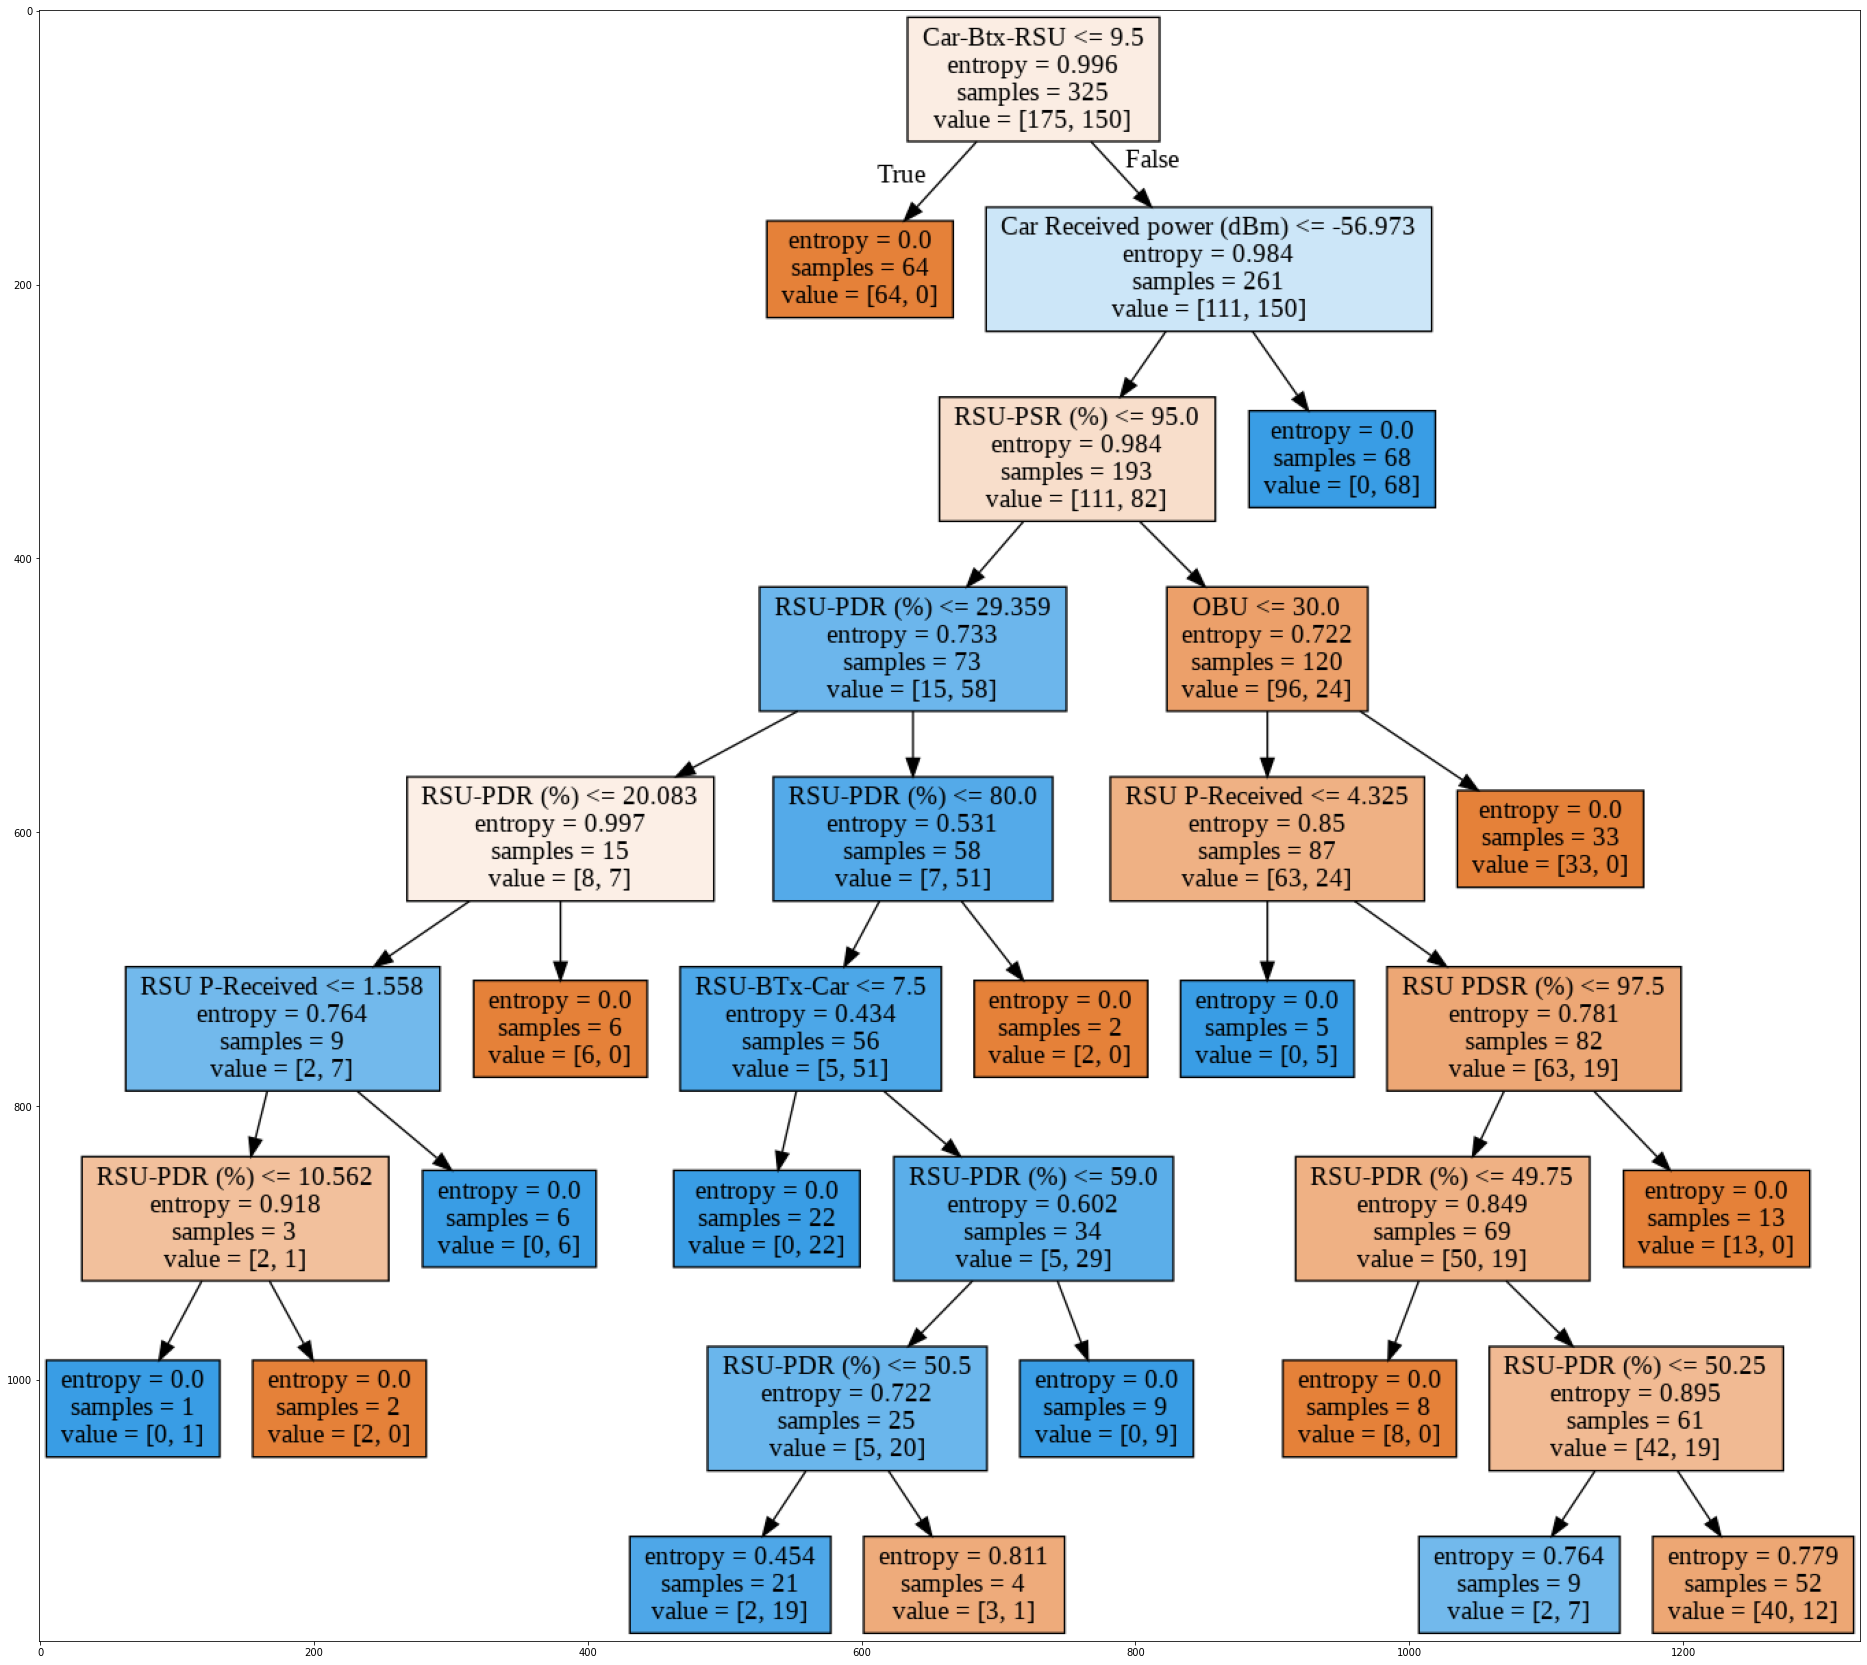

In [ ]:
# Reading the Image from the directory and plotting them.
from PIL import Image
im = Image.open('/content/Vanet_intrusion_Decision_Tree.png', mode='r')

# Plotting the Decision tree 
import matplotlib.pyplot as plt
plt.figure(figsize=(50,30))
plt.imshow(im)
plt.show()

# Tuning Random Forest Classifier:
Based on the following two parameters.
- number of estimators
- maximum depth of each tree in forest

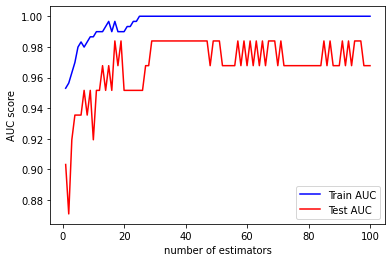

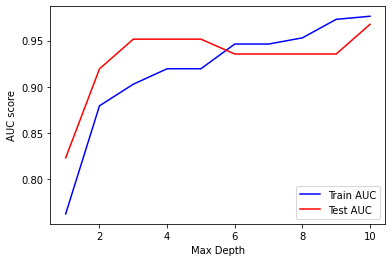

In [ ]:

# InDepth Tuning number of estimators &  Maximum Depth parameter.

# Assigning range of parameter of number of estimators
n_estimators = np.linspace(1,100, num =100, endpoint=True).astype(int)

# Two lists for string training & testing results.
train_results = []
test_results = []

# Iterating over the range of parameters of number of estimators
for n_estimator in n_estimators:

      # Creating & Fitting Random Forest classifier for a number of estimators parameter each time in the loop with entropy as impurity criterion.
      model = RandomForestClassifier(criterion= 'entropy', n_estimators=n_estimator,random_state=9)
      model.fit(X_train, y_train)
      
      # Prediction on the X_train data, Roc CURVE on the train data, Area under curve metric calculation and at last appending the train auc results.
      train_pred = model.predict(X_train)
      false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
      roc_auc = auc(false_positive_rate, true_positive_rate)
      train_results.append(roc_auc)

      # Prediction on the X_test data, Roc CURVE on the test data, Area under curve metric calculation and at last appending the test auc results.
      y_pred = model.predict(X_test)
      false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
      roc_auc = auc(false_positive_rate, true_positive_rate)
      test_results.append(roc_auc)

  
# Plotting the train results, test auc results
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2 = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(loc='best')
plt.ylabel('AUC score')
plt.xlabel('number of estimators')
plt.show()

# Creating dataframe with train and test auc results  
n_estimators_df = pd.DataFrame({'n_estimators': n_estimators,'test_results':test_results, 'train_results':train_results}).sort_values(by=['test_results', 'train_results'])


# Assigning range of parameters of max_depth
max_depths = np.linspace(1,10, num =10, endpoint=True).astype(int)

# Two lists for string training & testing results.
train_results = []
test_results = []

# Iterating over the range of parameters of max_depths
for max_depth in max_depths:

      # Creating & Fitting Random Forest classifier for a max_depth parameter each time in the loop with entropy as impurity criterion and 13 as optimum number of estimators
      model = RandomForestClassifier(criterion= 'entropy', n_estimators=13,max_depth = max_depth, random_state=9)
      model.fit(X_train, y_train)
      
      # Prediction on the X_train data, Roc CURVE on the train data, Area under curve metric calculation and at last appending the train auc results.
      train_pred = model.predict(X_train)
      false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
      roc_auc = auc(false_positive_rate, true_positive_rate)
      train_results.append(roc_auc)

      # Prediction on the X_test data, Roc CURVE on the test data, Area under curve metric calculation and at last appending the test auc results.
      y_pred = model.predict(X_test)
      false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
      roc_auc = auc(false_positive_rate, true_positive_rate)
      test_results.append(roc_auc)

  
# Plotting the train results, test auc results
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2 = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(loc='best')
plt.ylabel('AUC score')
plt.xlabel('Max Depth')
plt.show()

  
max_depth_df = pd.DataFrame({'max_depths':max_depths,'test_results':test_results, 'train_results':train_results}).sort_values(by=['test_results', 'train_results'])



In [ ]:
# Accuracy for different depths
max_depth_df

,max_depths,test_results,train_results
0,1,0.822581,0.761745
1,2,0.919355,0.879195
5,6,0.935484,0.946309
6,7,0.935484,0.946309
7,8,0.935484,0.953020
8,9,0.935484,0.973154
2,3,0.951613,0.902685
3,4,0.951613,0.919463
4,5,0.951613,0.919463
9,10,0.967742,0.976510


# Tuned Model Training with Random Forest Classifier Model
##### Checking the metrics of 
- Confusion Matrix
- Repeated Cross Validation score
- Precision
- recall
- f1_score
- Area under curve 


In [ ]:

# Train Tuned RandomForestClassifier model with number of estimators as 13 and maximum depth as 6
RF_model  = RandomForestClassifier(criterion= 'entropy', n_estimators=13,max_depth = 6, random_state=9)
RF_model.fit(X_train, y_train)

# Repeated stratified Cross validation with 10 folds, CV scores with 10 repeats & Calculating mean of 10 CV scores.
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)
n_scores = cross_val_score(RF_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
mean_cv = (100*np.mean(n_scores).round(2))

# Cross validation Score & its standard deviation.
print('Cross Validation Accuracy: {0}%  Standard Deviation: {1}' .format(mean_cv, np.std(n_scores).round(2)))
print(' ')

# Prediction on Train and Test datasets, Accuracy scores for train and test rounded to 2 decimals.
train_pred = RF_model.predict(X_train)
y_pred=RF_model.predict(X_test)
accuracy = RF_model.score(X_train,y_train)
test_accuracy = 100*(metrics.accuracy_score(y_test, y_pred).round(2))
print('Classifier Training accuracy score:',100*accuracy.round(2),'%')
print('Classifier Test Accuracy Score:',test_accuracy,'%')
print(' ')

# Model Classification report & Confusion Matrix
print(metrics.classification_report(y_test,y_pred))
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)

# ROC & Area Under the curve for train dataset. 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
train_roc_auc = auc(false_positive_rate, true_positive_rate)

# Creating True positive, True Negative, False Positive, False Negative.
TP = cm[0][0]
TN = cm[1][1]
FP = cm[1][0]
FN = cm[0][1]

# Test data metrics calculation like precision, recall, f1_score, roc curve, Area under curve.
test_precision = metrics.precision_score(y_test, y_pred)
test_recall = metrics.recall_score(y_test, y_pred)
test_f1_score = metrics.f1_score(y_test, y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
test_roc_auc = auc(false_positive_rate, true_positive_rate)


# Creating DataFrame for all the metrics.
RF_results = pd.DataFrame({'Test Accuracy (%)': test_accuracy, 'Train Accuracy (%)':100*accuracy.round(2),'10 Fold Cross Validation Accuracy (%)': mean_cv, 'Test Area Under Curve':test_roc_auc, 'Train Area Under Curve':train_roc_auc,'Test Precision': test_precision,
              'Test Recall': test_recall, 'Test F1 Score': test_f1_score, 'TP':TP, 'TN':TN, 'FP':FP, 'FN':FN},index=[0])

# View the metrics in dataframe
RF_results

Cross Validation Accuracy: 89.0%  Standard Deviation: 0.05
 
Classifier Training accuracy score: 95.0 %
Classifier Test Accuracy Score: 94.0 %
 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        31
           1       1.00      0.87      0.93        31

    accuracy                           0.94        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.94      0.94      0.94        62

[[31  0]
 [ 4 27]]


,Test Accuracy (%),Train Accuracy (%),10 Fold Cross Validation Accuracy (%),Test Area Under Curve,Train Area Under Curve,Test Precision,Test Recall,Test F1 Score,TP,TN,FP,FN
0,94.0,95.0,89.0,0.935484,0.946309,1.0,0.870968,0.931034,31,27,4,0


In [ ]:
RF_model.estimators_


[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=6, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=44556670, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=6, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1565348188, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=6, ma

# Plotting Receiver Operating Charateristics:

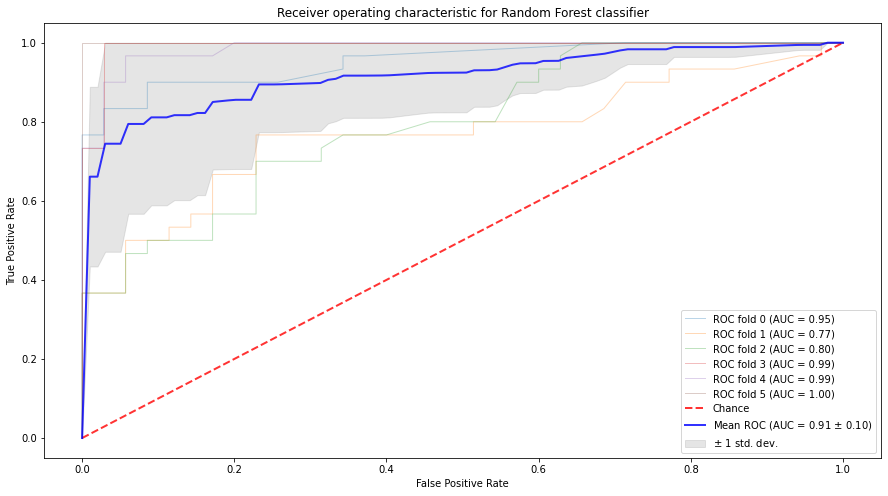

In [ ]:
# Receiver Operating Charateristics Plot

# Creating numpy array from X and y datasets
np_X = np.array(X)
np_y = np.array(y)

# Storing shape of array into n_samples, n_features
n_samples, n_features = np_X.shape

# Create an array for storing true positive rates and area under curve.
tprs = []
aucs = []

# create a mean false positive rate range in between 0 to 1.
mean_fpr = np.linspace(0, 1, 100)

# Create a figure with axis and subplots support.
fig, ax = plt.subplots()

# Run stratified cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)

# Loop Over the Splits of data for cross validation of 6 splits
for i, (train, test) in enumerate(cv.split(np_X, np_y) ):
    
    RF_model.fit(np_X[train], np_y[train])                                      # Fit the model on the train data leaving validation data in each split.
    viz = metrics.plot_roc_curve(RF_model, np_X[test] ,np_y[test] ,
                         name='ROC fold {}'.format(i),                          # plot the ROC curve for each split on the data.
                         alpha=0.3, lw=1, ax=ax)
    
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)                          # Interpolating Actual false positive rate and true positive rate at each point of assumed mean_fpr.
    interp_tpr[0] = 0.0                                                         # numpy.interp(x, xp, fp) function returns the one-dimensional
                                                                                # piecewise linear interpolant to a function with 
                                                                                # given discrete data points (xp, fp), evaluated at x.

    tprs.append(interp_tpr)                                                     # Append the true positive rates values to tprs array.
    aucs.append(viz.roc_auc)                                                    # Append the area under curve values to aucs array. 


# plotting Chance line which shows the diagnol line with area under curve required.
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

# finding the mean value of true positive rate corresponting to mean_fpr instances.
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0

# Calculating mean area under curve & standard deviations
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Finally plotting Mean ROC line into the figure.
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

# Calculating Standard deviation between lower and upper true positive rates to fill in between
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

# Set the title of plot, Best Legend Location, Figure size in inches.
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic for Random Forest classifier")
ax.legend(loc="lower right")
fig.set_size_inches(15,8)
plt.show()

# Extra trees Classifier:
#### Checking the metrics of 
- Confusion Matrix
- Repeated Cross Validation score
- Precision
- recall
- f1_score
- Area under curve 

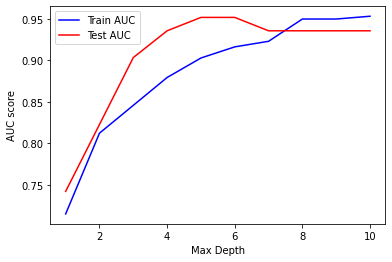

In [ ]:
# InDepth Tuning number of estimators &  Maximum Depth parameter.

# Assigning range of parameter of number of estimators
n_estimators = np.linspace(1,100, num =100, endpoint=True).astype(int)

# Two lists for string training & testing results.
train_results = []
test_results = []

# Iterating over the range of parameters of number of estimators
for n_estimator in n_estimators:

      # Creating & Fitting Extra Trees classifier for a number of estimators parameter each time in the loop with entropy as impurity criterion.
      model = ExtraTreesClassifier(criterion= 'entropy', n_estimators=n_estimator,random_state=9)
      model.fit(X_train, y_train)
      
      # Prediction on the X_train data, Roc CURVE on the train data, Area under curve metric calculation and at last appending the train auc results.
      train_pred = model.predict(X_train)
      false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
      roc_auc = auc(false_positive_rate, true_positive_rate)
      train_results.append(roc_auc)

      # Prediction on the X_test data, Roc CURVE on the test data, Area under curve metric calculation and at last appending the test auc results.
      y_pred = model.predict(X_test)
      false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
      roc_auc = auc(false_positive_rate, true_positive_rate)
      test_results.append(roc_auc)

  
# Plotting the train results, test auc results
# from matplotlib.legend_handler import HandlerLine2D
# line1 = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
# line2 = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
# plt.legend(loc='best')
# plt.ylabel('AUC score')
# plt.xlabel('number of estimators')
# plt.show()

# Creating dataframe with train and test auc results  
n_estimators_df = pd.DataFrame({'n_estimators': n_estimators,'test_results':test_results, 'train_results':train_results}).sort_values(by=['test_results', 'train_results'])


# Assigning range of parameters of max_depth
max_depths = np.linspace(1,10, num =10, endpoint=True).astype(int)

# Two lists for string training & testing results.
train_results = []
test_results = []

# Iterating over the range of parameters of max_depths
for max_depth in max_depths:

      # Creating & Fitting Extra Trees classifier for a max_depth parameter each time in the loop with entropy as impurity criterion and 12 as optimal number of estimators
      model = ExtraTreesClassifier(criterion= 'entropy', n_estimators=12 ,max_depth = max_depth, random_state=9)
      model.fit(X_train, y_train)
      
      # Prediction on the X_train data, Roc CURVE on the train data, Area under curve metric calculation and at last appending the train auc results.
      train_pred = model.predict(X_train)
      false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
      roc_auc = auc(false_positive_rate, true_positive_rate)
      train_results.append(roc_auc)

      # Prediction on the X_test data, Roc CURVE on the test data, Area under curve metric calculation and at last appending the test auc results.
      y_pred = model.predict(X_test)
      false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
      roc_auc = auc(false_positive_rate, true_positive_rate)
      test_results.append(roc_auc)

  
# Plotting the train results, test auc results
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2 = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(loc='best')
plt.ylabel('AUC score')
plt.xlabel('Max Depth')
plt.show()

# Creating dataframe with train and test auc results 
max_depth_df = pd.DataFrame({'max_depths':max_depths,'test_results':test_results, 'train_results':train_results}).sort_values(by=['test_results', 'train_results'])



In [ ]:
# Results:
max_depth_df

,max_depths,test_results,train_results
0,1,0.741935,0.714765
1,2,0.822581,0.812081
2,3,0.903226,0.845638
3,4,0.935484,0.879195
6,7,0.935484,0.922819
8,9,0.935484,0.949664
7,8,0.935484,0.949664
9,10,0.935484,0.953020
4,5,0.951613,0.902685
5,6,0.951613,0.916107


# Tuned ExtraTrees Classifier:

In [ ]:
# Train Tuned ExtraTrees Classifier model with number of estimators as 12 and maximum depth as 8
ET_model  = ExtraTreesClassifier(criterion= 'entropy', n_estimators=12,max_depth = 8, random_state=9)
ET_model.fit(X_train, y_train)

# Repeated stratified Cross validation with 10 folds, CV scores with 10 repeats & Calculating mean of 10 CV scores.
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)
n_scores = cross_val_score(ET_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
mean_cv = (100*np.mean(n_scores).round(2))

# Cross validation Score & its standard deviation.
print('Cross Validation Accuracy: {0}%  Standard Deviation: {1}' .format(mean_cv, np.std(n_scores).round(2)))
print(' ')

# Prediction on Train and Test datasets, Accuracy scores for train and test rounded to 2 decimals.
train_pred = ET_model.predict(X_train)
y_pred=ET_model.predict(X_test)
accuracy = ET_model.score(X_train,y_train)
test_accuracy = 100*(metrics.accuracy_score(y_test, y_pred).round(2))
print('Classifier Training accuracy score:',100*accuracy.round(2),'%')
print('Classifier Test Accuracy Score:',test_accuracy,'%')
print(' ')

# Model Classification report & Confusion Matrix
print(metrics.classification_report(y_test,y_pred))
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)

# ROC & Area Under the curve for train dataset. 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
train_roc_auc = auc(false_positive_rate, true_positive_rate)

# Creating True positive, True Negative, False Positive, False Negative.
TP = cm[0][0]
TN = cm[1][1]
FP = cm[1][0]
FN = cm[0][1]

# Test data metrics calculation like precision, recall, f1_score, roc curve, Area under curve.
test_precision = metrics.precision_score(y_test, y_pred)
test_recall = metrics.recall_score(y_test, y_pred)
test_f1_score = metrics.f1_score(y_test, y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
test_roc_auc = auc(false_positive_rate, true_positive_rate)


# Creating DataFrame for all the metrics.
ET_results = pd.DataFrame({'Test Accuracy (%)': test_accuracy, 'Train Accuracy (%)':100*accuracy.round(2),'10 Fold Cross Validation Accuracy (%)': mean_cv, 'Test Area Under Curve':test_roc_auc, 'Train Area Under Curve':train_roc_auc,'Test Precision': test_precision,
              'Test Recall': test_recall, 'Test F1 Score': test_f1_score, 'TP':TP, 'TN':TN, 'FP':FP, 'FN':FN},index=[0])

# View the metrics in dataframe
ET_results


Cross Validation Accuracy: 89.0%  Standard Deviation: 0.06
 
Classifier Training accuracy score: 95.0 %
Classifier Test Accuracy Score: 94.0 %
 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        31
           1       1.00      0.87      0.93        31

    accuracy                           0.94        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.94      0.94      0.94        62

[[31  0]
 [ 4 27]]


,Test Accuracy (%),Train Accuracy (%),10 Fold Cross Validation Accuracy (%),Test Area Under Curve,Train Area Under Curve,Test Precision,Test Recall,Test F1 Score,TP,TN,FP,FN
0,94.0,95.0,89.0,0.935484,0.949664,1.0,0.870968,0.931034,31,27,4,0


# Receiver Operating Characteristics

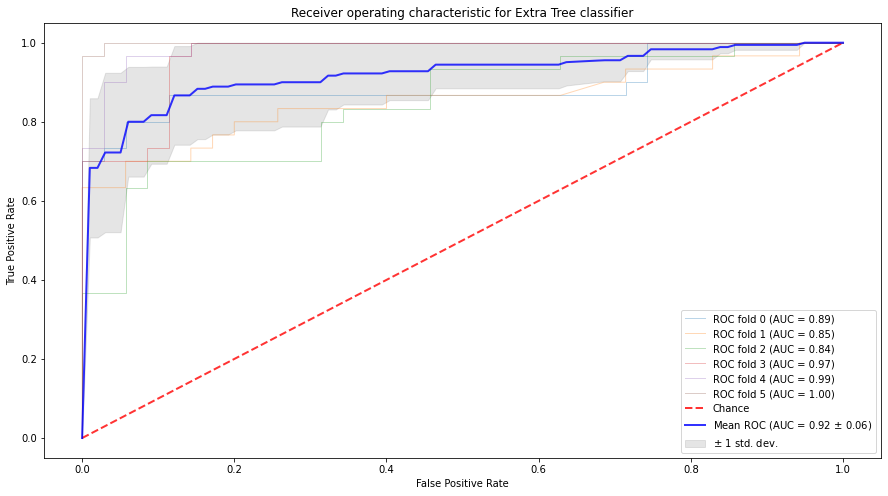

In [ ]:
# Receiver Operating Charateristics Plot

# Creating numpy array from X and y datasets
np_X = np.array(X)
np_y = np.array(y)

# Storing shape of array into n_samples, n_features
n_samples, n_features = np_X.shape

# Create an array for storing true positive rates and area under curve.
tprs = []
aucs = []

# create a mean false positive rate range in between 0 to 1.
mean_fpr = np.linspace(0, 1, 100)

# Create a figure with axis and subplots support.
fig, ax = plt.subplots()

# Run stratified cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)

# Loop Over the Splits of data for cross validation of 6 splits
for i, (train, test) in enumerate(cv.split(np_X, np_y) ):
    
    ET_model.fit(np_X[train], np_y[train])                                      # Fit the model on the train data leaving validation data in each split.
    viz = metrics.plot_roc_curve(ET_model, np_X[test] ,np_y[test] ,
                         name='ROC fold {}'.format(i),                          # plot the ROC curve for each split on the data.
                         alpha=0.3, lw=1, ax=ax)
    
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)                          # Interpolating Actual false positive rate and true positive rate at each point of assumed mean_fpr.
    interp_tpr[0] = 0.0                                                         # numpy.interp(x, xp, fp) function returns the one-dimensional
                                                                                # piecewise linear interpolant to a function with 
                                                                                # given discrete data points (xp, fp), evaluated at x.

    tprs.append(interp_tpr)                                                     # Append the true positive rates values to tprs array.
    aucs.append(viz.roc_auc)                                                    # Append the area under curve values to aucs array. 


# plotting Chance line which shows the diagnol line with area under curve required.
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

# finding the mean value of true positive rate corresponting to mean_fpr instances.
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0

# Calculating mean area under curve & standard deviations
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Finally plotting Mean ROC line into the figure.
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

# Calculating Standard deviation between lower and upper true positive rates to fill in between
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

# Set the title of plot, Best Legend Location, Figure size in inches.
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic for Extra Tree classifier")
ax.legend(loc="lower right")
fig.set_size_inches(15,8)
plt.show()

# Comparing Results for DT, RF, ET:


In [ ]:
final_results = pd.concat([DT_results, RF_results, ET_results])
final_results.insert(loc=0, column='Model', value=['Decision Tree', 'Random Forest', 'Extra Trees'])
final_results = final_results.set_index('Model')
final_results

,Test Accuracy (%),Train Accuracy (%),10 Fold Cross Validation Accuracy (%),Test Area Under Curve,Train Area Under Curve,Test Precision,Test Recall,Test F1 Score,TP,TN,FP,FN
Model,,,,,,,,,,,,
Decision Tree,97.0,95.0,87.0,0.967742,0.946309,1.0,0.935484,0.966667,31,29,2,0
Random Forest,94.0,95.0,89.0,0.935484,0.946309,1.0,0.870968,0.931034,31,27,4,0
Extra Trees,94.0,95.0,89.0,0.935484,0.949664,1.0,0.870968,0.931034,31,27,4,0


#1) Decision Tree VS Random Forest:

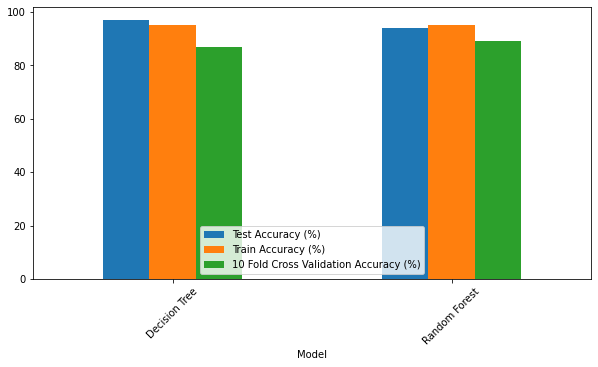

In [ ]:
# Test, Train, Cross Validation accuracy between Decision Tree and Random Forest
final_results.iloc[:2, :3].plot(kind = 'bar', figsize=(10,5))
plt.xticks(rotation=45)
plt.show()

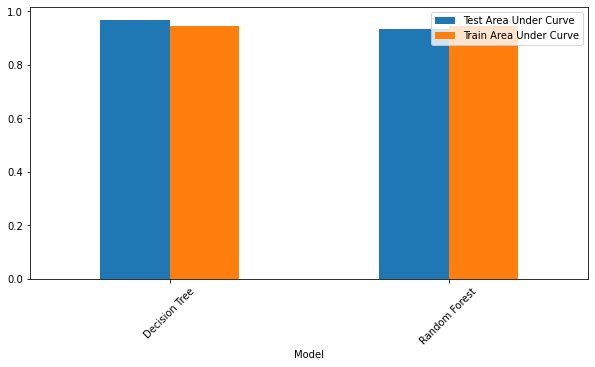

In [ ]:
# Test, Train Area Under Curve between Decision Tree and Random Forest
final_results.iloc[:2, 3:5].plot(kind = 'bar', figsize=(10,5))
plt.xticks(rotation=45)
plt.show()

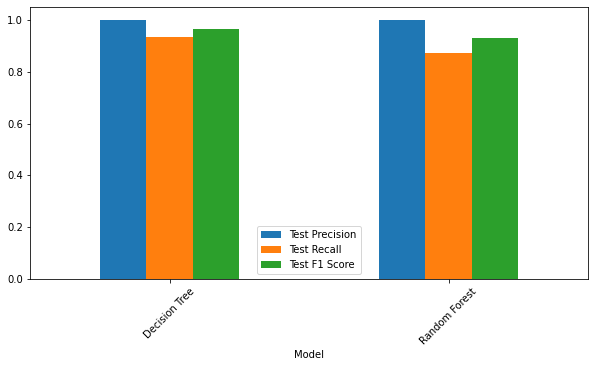

In [ ]:
# Test-  precision, recall, F1-Score between Decision Tree and Random Forest
final_results.iloc[:2, 5:8].plot(kind = 'bar', figsize=(10,5))
plt.xticks(rotation=45)
plt.show()

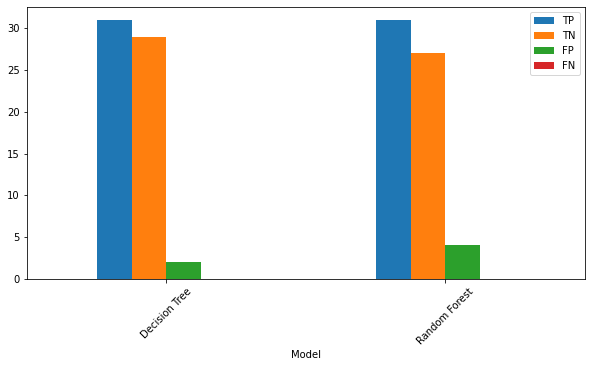

In [ ]:
# TP, TN, FP, FN between Decision Tree and Random Forest
final_results.iloc[:2, 8:].plot(kind = 'bar', figsize=(10,5))
plt.xticks(rotation=45)
plt.show()

#2) Random Forest VS Extra Trees Classifier:

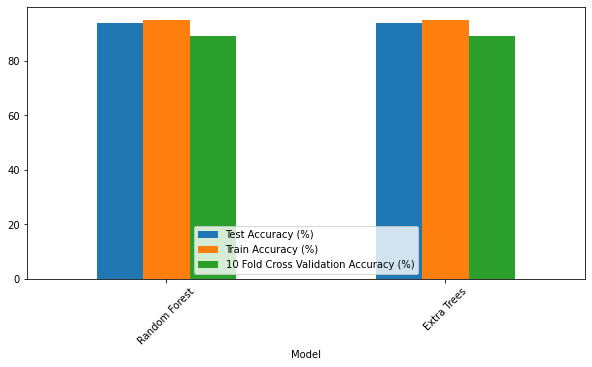

In [ ]:
# Test, Train, Cross Validation accuracy between Extra Tree and Random Forest
final_results.iloc[1:, :3].plot(kind = 'bar', figsize=(10,5))
plt.xticks(rotation=45)
plt.show()

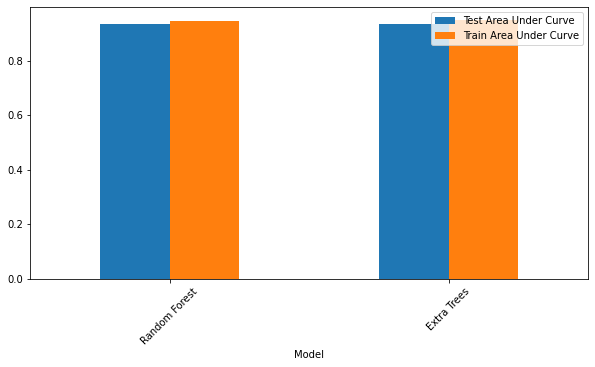

In [ ]:
# Test, Train Area Under Curve between Extra Tree and Random Forest
final_results.iloc[1:, 3:5].plot(kind = 'bar', figsize=(10,5))
plt.xticks(rotation=45)
plt.show()

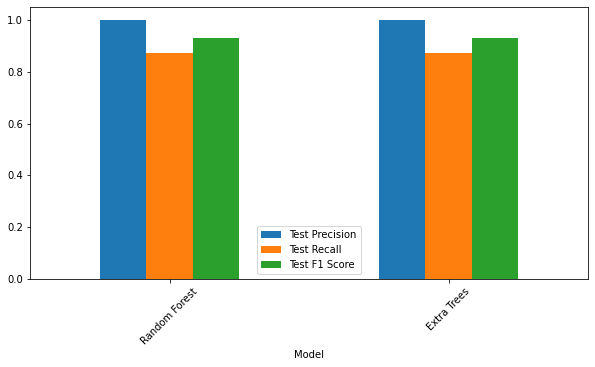

In [ ]:
# Test-  precision, recall, F1-Score between Extra Tree and Random Forest
final_results.iloc[1:, 5:8].plot(kind = 'bar', figsize=(10,5))
plt.xticks(rotation=45)
plt.show()

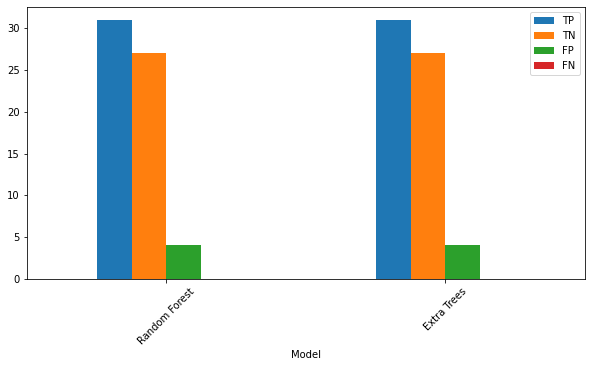

In [ ]:
# TP, TN, FP, FN between Extra Tree and Random Forest
final_results.iloc[1:, 8:].plot(kind = 'bar', figsize=(10,5))
plt.xticks(rotation=45)
plt.show()

#3) Decision Tree VS Extra Trees Classifier:

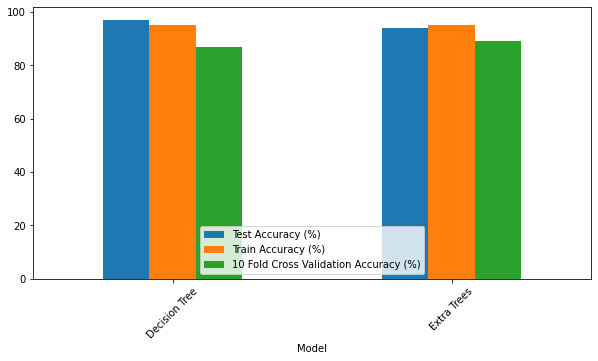

In [ ]:
# Test, Train, Cross Validation accuracy between Extra Tree and Decision Tree
final_results.iloc[[0,2], :3].plot(kind = 'bar', figsize=(10,5))
plt.xticks(rotation=45)
plt.show()

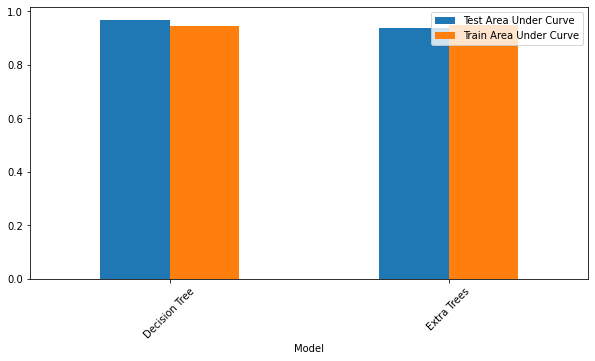

In [ ]:
# Test, Train Area Under Curve between Extra Tree and Deicision Tree
final_results.iloc[[0,2], 3:5].plot(kind = 'bar', figsize=(10,5))
plt.xticks(rotation=45)
plt.show()

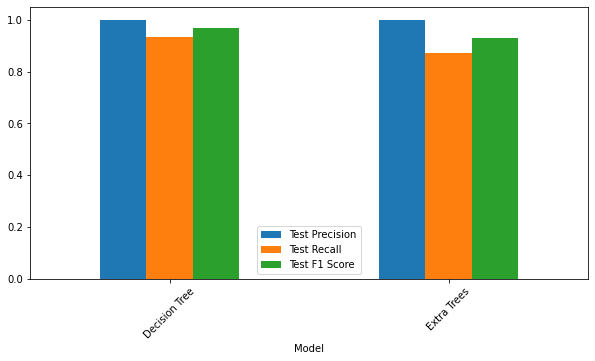

In [ ]:
# Test-  precision, recall, F1-Score between Extra Tree and Decision tree
final_results.iloc[[0,2], 5:8].plot(kind = 'bar', figsize=(10,5))
plt.xticks(rotation=45)
plt.show()

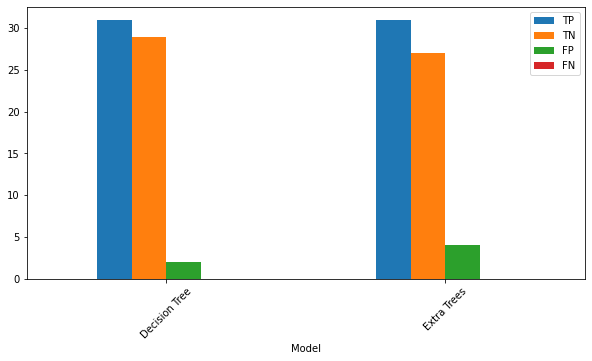

In [ ]:
# TP, TN, FP, FN between Extra Tree and Decision Tree
final_results.iloc[[0,2], 8:].plot(kind = 'bar', figsize=(10,5))
plt.xticks(rotation=45)
plt.show()

# Comparing Precision, Recall, F1-Score of all three:

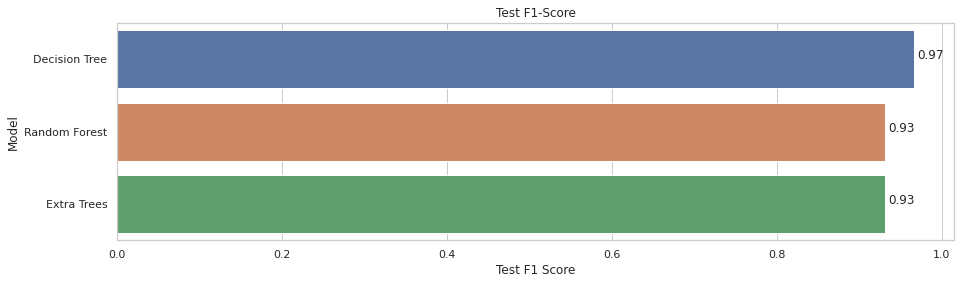

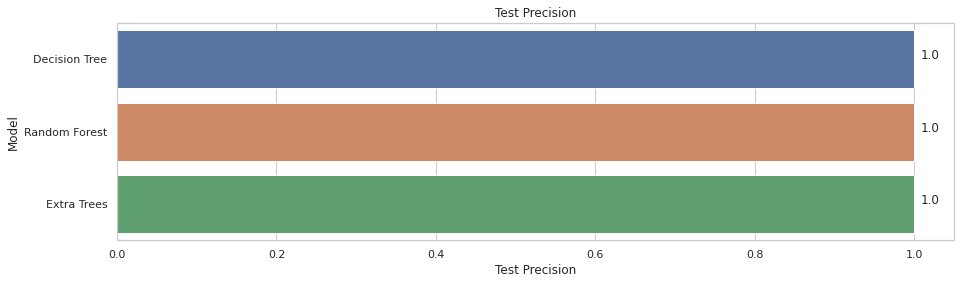

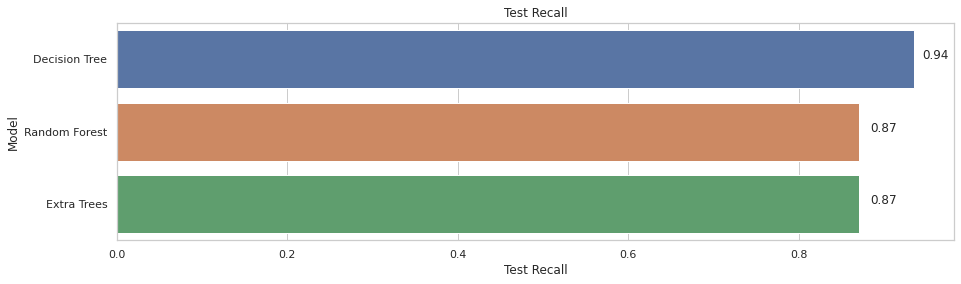

In [ ]:
# Plot for F1-score
plt.figure(figsize=(15,4))
sns.set_theme(style= 'whitegrid')
g = sns.barplot(x= final_results['Test F1 Score'],y=final_results.index)

g.text(y =0, x=0.97, s=final_results.loc['Decision Tree', 'Test F1 Score'].round(2))
g.text(y =1, x=0.935, s=final_results.loc['Random Forest', 'Test F1 Score'].round(2))
g.text(y =2, x=0.935, s=final_results.loc['Extra Trees', 'Test F1 Score'].round(2))

plt.title('Test F1-Score')
plt.show()

# Plot for Precision
plt.figure(figsize=(15,4))
sns.set_theme(style= 'whitegrid')
g = sns.barplot(x= final_results['Test Precision'],y=final_results.index)

g.text(y =0, x= 1.02, s=final_results.loc['Decision Tree', 'Test Precision'].round(2), ha='center')
g.text(y =1, x= 1.02, s=final_results.loc['Random Forest', 'Test Precision'].round(2), ha='center')
g.text(y =2, x= 1.02, s=final_results.loc['Extra Trees', 'Test Precision'].round(2), ha='center')
plt.title('Test Precision')
plt.show()

# Plot for recall
plt.figure(figsize=(15,4))
sns.set_theme(style= 'whitegrid')
g = sns.barplot(x= final_results['Test Recall'],y=final_results.index)
g.text(y = 0, x= 0.96, s=final_results.loc['Decision Tree', 'Test Recall'].round(2), ha='center')
g.text(y = 1, x= 0.9, s=final_results.loc['Random Forest', 'Test Recall'].round(2), ha='center')
g.text(y = 2, x= 0.9, s=final_results.loc['Extra Trees', 'Test Recall'].round(2), ha='center')
plt.title('Test Recall')
plt.show()